In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from multi_tester import *

In [18]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [19]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8,
)

feature_generator_kargs = {
    "operations" : [add, sub, mul, div, hyp, log],
    "operation_names" : ["+", "-", "*", "/", "hyp", "log"],
    "popsize" : 120,
    "maxiter" : 200,
    "mutation_rate" : 0.05,
    "max_tree_depth" : 8,
}

In [20]:
dataset = pd.read_csv("csv/adm_data.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [21]:
tester = tester(X, y, feature_generator_kargs, 8, 1, 400, verbose = True, test_size = 0.3, random_state = 17)

In [22]:
tester.test_models(notests=30, nodatatests=2)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.6660161481651552 Generation best 0.6469215168560823
Split:  0 Feature:  1
Iteration:  199 Best fitness:  0.6660161481651552 Generation best 0.6660161481651552
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.5948417709409559 Generation best 0.5917805074044311
Split:  0 Feature:  3
Iteration:  199 Best fitness:  0.6565262312019287 Generation best 0.6401867370757279
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.6566792943787548 Generation best 0.6434393295832854
Split:  0 Feature:  5
Iteration:  199 Best fitness:  0.6660161481651552 Generation best 0.6410668503424788
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.6422148241686756 Generation best 0.5979795660658938
Split:  0 Feature:  7
Iteration:  199 Best fitness:  0.6716029541193127 Generation best 0.6463857957371906
Iteration 4 - MSE 0.23201260401957, R2 0.7826495741015888, MAE 0.33454815458661247, NEW_MSE 0.22054947794320318, NEW_R2 0.7933882809289788, NEW_

In [23]:
import os

# create forlder insuranse

if not os.path.exists("results/university"):
    os.makedirs("results/university")

for key in tester.individual_tests:
    tester.individual_tests[key].to_csv("results/university/" + key + ".csv")

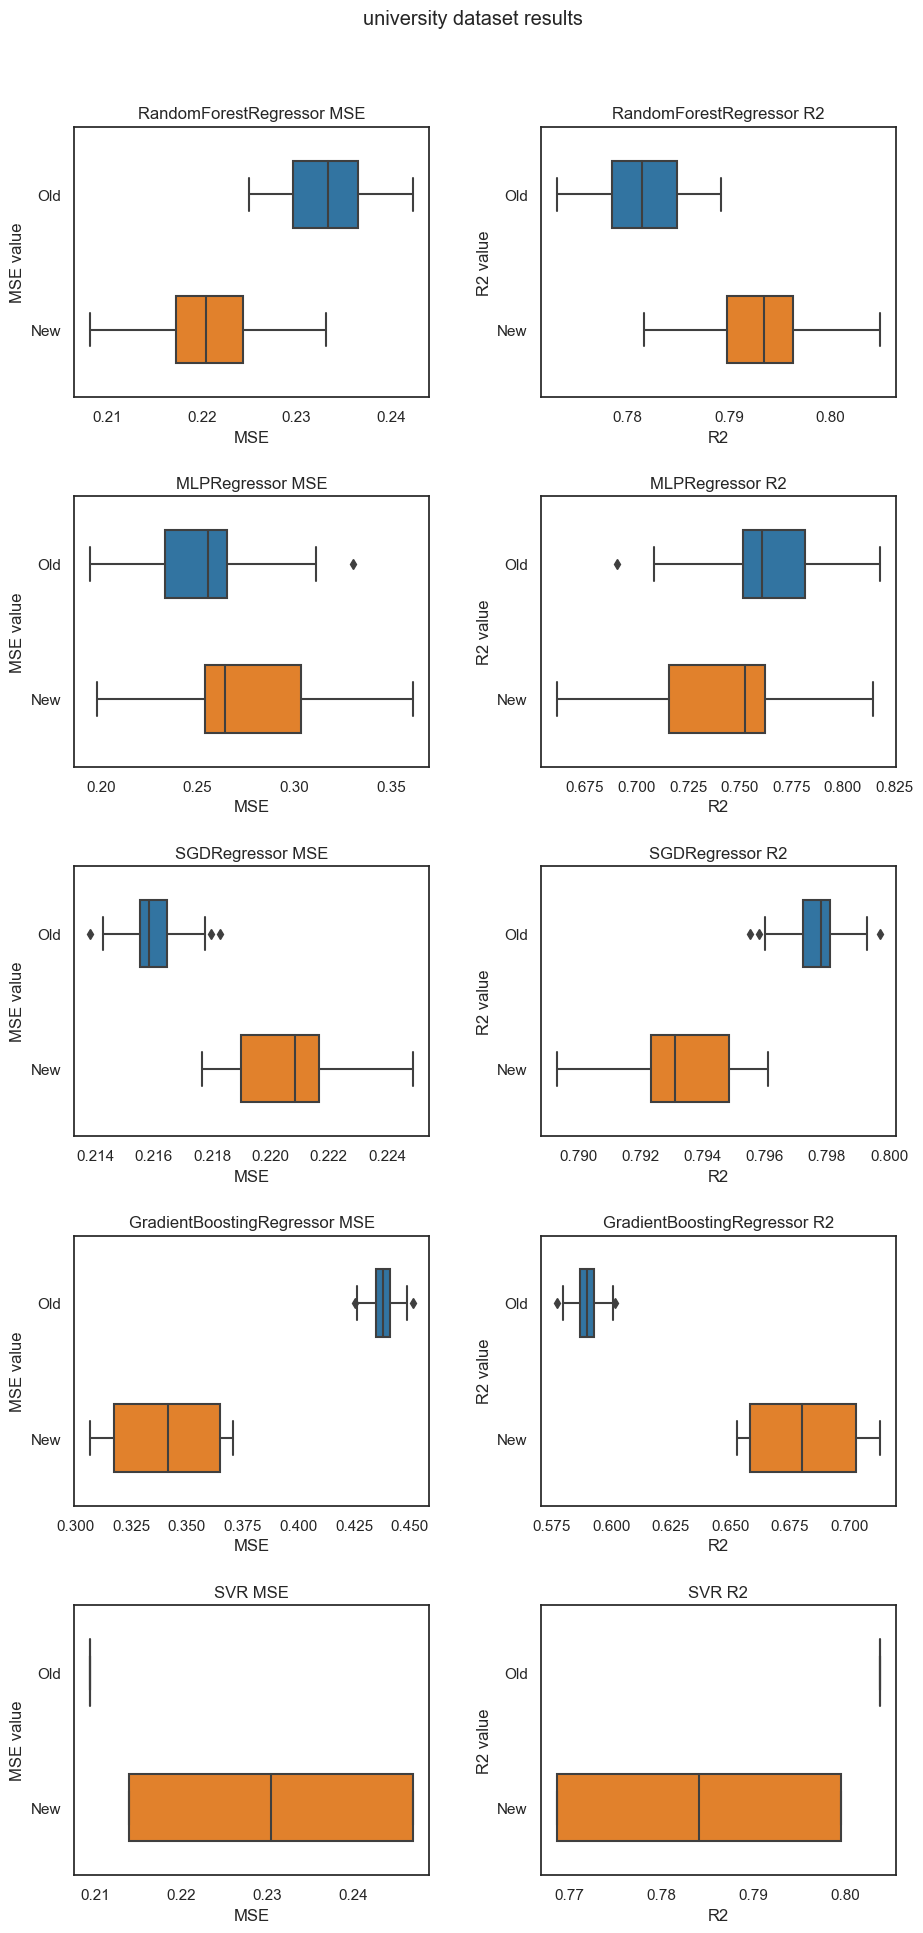

In [24]:
tests = tester.get_individual_tests()

from makeplots import make_boxplots

make_boxplots(tests, "university")